In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.approximation import clique

In [2]:
df = pd.read_csv('C:/Users/Rik/Documents/Radboud Universiteit/CCMLWI/wg5/wg6-network analysis/sociogram-employees-un.csv', header = None)

In [3]:
g = nx.Graph(df)

In [4]:
pos = nx.spring_layout(g, scale = 10)

In [5]:
labels={}
labels[0]='A'
labels[1]='B'
labels[2]='C'
labels[3]='D'
labels[4]='E'
labels[5]='F'
labels[6]='G'
labels[7]='H'
labels[8]='I'
labels[9]='J'
labels[10]='K'
labels[11]='L'
labels[12]='M'
labels[13]='N'
labels[14]='O'
labels[15]='P'
labels[16]='Q'
labels[17]='R'
labels[18]='S'
labels[19]='T'
labels[20]='U'
labels[21]='V'
labels[22]='W'
labels[23]='X'
labels[24]='Y'

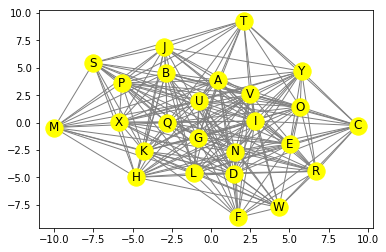

In [6]:
nx.draw_networkx(g, pos, with_labels = True, node_color = 'yellow', edge_color = 'grey', labels = labels)

In [7]:
def cliqueToLabels(clique):
    vertices = []
    for el in clique:
        vertices.append(labels[el])
    return vertices

In [8]:
def total_count(dict):
    total = 0
    for el in range(len(dict)):
        total += dict[el]
    return total

In [9]:
def toArray(dict):
    dictlist = []
    for key, value in dict.items():
        dictlist.append(value)
    return dictlist

In [10]:
def betweenness_cluster(btws, k):
    cluster = [[] for _ in range(k)]
    diff = max(btws) - min(btws)
    slice_size = diff/k
    for el in range(0, len(btws)):
        temp = min(btws)
        counter = -1
        if(btws[el] is max(btws)):
            cluster[k-1].append(el)
        else:
            while(temp <= btws[el]):
                temp += slice_size
                counter += 1
            cluster[counter].append(el)
    for c in range(0, len(cluster)):
        cluster[c] = cliqueToLabels(cluster[c])
    return cluster    

Below are all exercises for part 2 of the network analysis assignment.
2.11 Shows the biggest clique in the group, namely one of size 10.

In [11]:
#2.11
all_cliques = list(nx.find_cliques(g))
lens = []
for c in all_cliques:
    lens.append(len(c))
index_of_max = lens.index(max(lens))
cliqueToLabels(all_cliques[index_of_max])

['D', 'A', 'K', 'V', 'I', 'Q', 'B', 'J', 'H', 'X']

The total number of cliques present in this group is 128

In [12]:
#2.12
len(all_cliques)

128

Network cohesion is denoted in network as the node connectivity, meaning the minimum number of edges that need to be removed to disconnect the nodes from one another. In this case this value is 13.

In [13]:
#2.13
nx.node_connectivity(g)

13

Networkx provides a function to calculate the betweenness value of each node. Values close to each other are clustered together. Below we have chosen to create 5 clusters.

In [14]:
#2.14
btws = nx.betweenness_centrality(g)
betweenness_cluster(toArray(btws), 5)

[['C', 'F', 'M', 'R', 'T', 'W'],
 ['H', 'J', 'P', 'S', 'Y'],
 ['B', 'E', 'G', 'O', 'X'],
 ['A', 'K', 'N', 'U'],
 ['D', 'I', 'L', 'Q', 'V']]

The graph has only one component, namely the entire graph. This means that there are no separate subgraphs that are detached from the rest of the graph.

In [15]:
#2.15
nx.number_connected_components(g)

1

Only one cycle (loop edge) is found. This loop edges goes from A -> B -> D -> A (indexes of these ndoes are shown below)

In [16]:
#2.16
nx.find_cycle(g)

[(0, 1), (1, 3), (3, 0)]

Total number of triangles present in the graph is 2421

In [17]:
#2.17
total_count(nx.triangles(g))

2421

Total number of triangles where node S is present is 63

In [18]:
#2.17.5
nx.triangles(g, 18)

63

The clustering coefficient of all nodes combined is around 0.71. In the next block we calculate the same value for a random graph and the coefficient seems to be almost the same. From this we can safely conclude that the clustering for this network is not statistically significant.

In [19]:
#2.18
nx.average_clustering(g)

0.718530402174365

In [20]:
#2.18.5
g_rand = nx.gnm_random_graph(g.number_of_nodes(), g.number_of_edges())
nx.average_clustering(g_rand)

0.7060287758337291

A small world graph is constructed using the Watts Strogatz function of the networkx package. In this case the number of nearest neighbors is 7 and the rewiring probability is set to 0.08 to keep the graph clear and show the small world architecture.

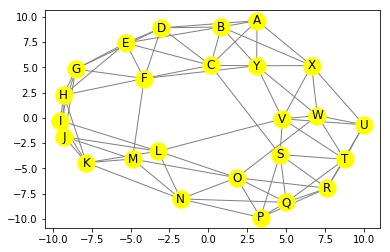

In [21]:
#2.19: Small world graph with 25 nodes and 7 nearest neighbors
g_small_world = nx.watts_strogatz_graph(g.number_of_nodes(), g.number_of_nodes()-18, 0.08)
pos_sm = nx.spring_layout(g_small_world, scale = 10)
nx.draw_networkx(g_small_world, pos_sm, with_labels = True, node_color = 'yellow', edge_color = 'grey', labels = labels)